In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import json
import numpy as np
import matplotlib.pyplot as plt


#Time-series 
#convert price history to dictionary


In [3]:
df = pd.read_csv('df_completed.csv')
df.head()

,name,district,latitude,longitude,year_built,proj_area,nbr_buildings,nbr_floors,units,shops,...,restaurants,hospital,amenities,transportation,price_sqm,change_last_q,change_last_y,rental_yield,change_last_y_rental_price,price_hist
0,\n 101 Mansion\n,\n Bang Kapi\n,"""13.7874348""","""100.6315637""",1991,"23,371",5,5,834,['De Junction Plaza is 1.5 km away (approximat...,...,['Ban Kalae Restaurant – 480 m (6 minutes by f...,"Lat Phrao Hospital is the nearest hospital, wh...","[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]","[('marker-expressway', 'Lat Phrao Toll Plaza',...",10577,0.00,-95.9,0.00,–,"[{""date"":""2008-10-01"",""value"":15735},{""date"":""..."
1,\n 624 Condolette Ladprao\n,\n Bang Kapi\n,"""13.766348""","""100.649395""",2011,"6,476",2,8,471,['Phan Thip Plaza Department Store (Phan Thip ...,...,"['Food Center – 400 m (5 minutes by foot)', 'S...","Vejthani Hospital is the nearest hospital, whi...","[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1]","[('marker-expressway', 'Lat Phrao Toll Plaza',...",49059,0.00,-0.78,6.34,10.68,"[{""date"":""2010-07-01"",""value"":36242},{""date"":""..."
2,\n Adamas Ramkhamhaeng\n,\n Bang Kapi\n,"""13.7524478""","""100.6155072""",1995,"4,699",1,16,140,['The Mall Department Store (Ramkhamhaeng 3) i...,...,['Bu-Nga Raya Restaurant – 300 m (4 minutes by...,Phaet Panya General Hospital is the nearest ho...,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]","[('marker-expressway', 'Srinagarindra Toll Pla...",31129,0.00,0,0.00,–,"[{""date"":""2014-10-01"",""value"":25258},{""date"":""..."
3,\n Aspire Ladprao 113\n,\n Bang Kapi\n,"""13.770286""","""100.638799""",2016,"3,816",1,8,270,['Tawanna 2 Department Store is 320 m away (ap...,...,['Bueng Phlan Chai Restaurant – 300 m (4 minut...,"Vejthani Hospital is the nearest hospital, whi...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]","[('marker-expressway', 'Lat Phrao Toll Plaza',...",87368,4.15,11.04,5.95,24.43,"[{""date"":""2016-10-01"",""value"":79976},{""date"":""..."
4,\n B.R. Condo\n,\n Bang Kapi\n,"""13.768706""","""100.63887599999998""",1991,"7,391",2,10,560,['Tawanna 2 Department Store is 8 m away (appr...,...,['Bueng Phlan Chai Restaurant – 180 m (2 minut...,"Vejthani Hospital is the nearest hospital, whi...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]","[('marker-expressway', 'Lat Phrao Toll Plaza',...",42597,0.00,-45.82,4.48,-48.71,"[{""date"":""2011-01-01"",""value"":87500},{""date"":""..."


In [4]:
df['price_hist'] = df['price_hist'].apply(json.loads)
price_hist_df = pd.concat([pd.DataFrame(x) for x in df['price_hist']], 
                          keys = df['district']).reset_index(level=1, drop=True).reset_index()

price_hist_df['date'] = pd.to_datetime(price_hist_df['date'])
df = pd.merge(df.drop(columns='price_hist'), price_hist_df, on='district')
dateee = df["date"]
print(dateee)
print(dateee.shape)

0         2008-10-01
1         2009-01-01
2         2009-04-01
3         2009-07-01
4         2009-10-01
             ...    
1885081   2018-01-01
1885082   2018-04-01
1885083   2018-07-01
1885084   2018-10-01
1885085   2019-01-01
Name: date, Length: 1885086, dtype: datetime64[ns]
(1885086,)


In [5]:
df[["district","date","value"]]

,district,date,value
0,\n Bang Kapi\n,2008-10-01,15735
1,\n Bang Kapi\n,2009-01-01,15529
2,\n Bang Kapi\n,2009-04-01,15221
3,\n Bang Kapi\n,2009-07-01,14912
4,\n Bang Kapi\n,2009-10-01,14604
...,...,...,...
1885081,\n Yan Nawa\n,2018-01-01,69808
1885082,\n Yan Nawa\n,2018-04-01,67542
1885083,\n Yan Nawa\n,2018-07-01,66031
1885084,\n Yan Nawa\n,2018-10-01,66031


In [6]:
#change object to numerical

cols_to_numeric = [ 'schools', 'restaurants', 'hospital','change_last_y', 'change_last_y_rental_price']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(0, inplace=True) 
    

In [7]:
df.sort_values(['district', 'date'], inplace=True)
df['price_lag1'] = df.groupby('district')['value'].shift(1)
df['price_lag2'] = df.groupby('district')['value'].shift(2)

#price_lag1 and 2 
df['price_lag1'] = df['price_lag1'].fillna(0)
df['price_lag2'] = df['price_lag2'].fillna(0)


In [8]:
features = ['year_built', 'nbr_floors', 'hospital', 'schools', 'restaurants', 'change_last_q', 'change_last_y', 'rental_yield', 
            'change_last_y_rental_price', 'price_lag1', 'price_lag2'] 

target = 'value' 

for feature in features:
    print(f"{feature}: {df[feature].dtype}")


year_built: int64
nbr_floors: int64
hospital: float64
schools: float64
restaurants: float64
change_last_q: float64
change_last_y: float64
rental_yield: float64
change_last_y_rental_price: float64
price_lag1: float64
price_lag2: float64


In [9]:
#convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

In [12]:
train = df[df['date'] < pd.to_datetime('2017-01-01')]
test = df[df['date'] >= pd.to_datetime('2017-01-01')]

print(train.shape)
print(test.shape)

# print(df['date'].min())
# print(df['date'].max())
# print(df.head())

(1364017, 24)
(521069, 24)
(1364017, 24)


In [13]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 100000.15600367922
Mean Absolute Error: 42572.70583336263


In [19]:

#create another df
future_df = pd.DataFrame()
districts = df['district'].unique()


In [20]:
for district in districts:
    last_row = df[df['district'] == district].iloc[-1]
    future_dates = pd.date_range(start='2018-01-01', periods=4, freq='3M')
    future = pd.DataFrame(future_dates, columns=['date'])

    for feature in features:
        future[feature] = last_row[feature]
        
    #Add the district name
    future['district'] = district
    future_df = pd.concat([future_df, future], ignore_index=True)


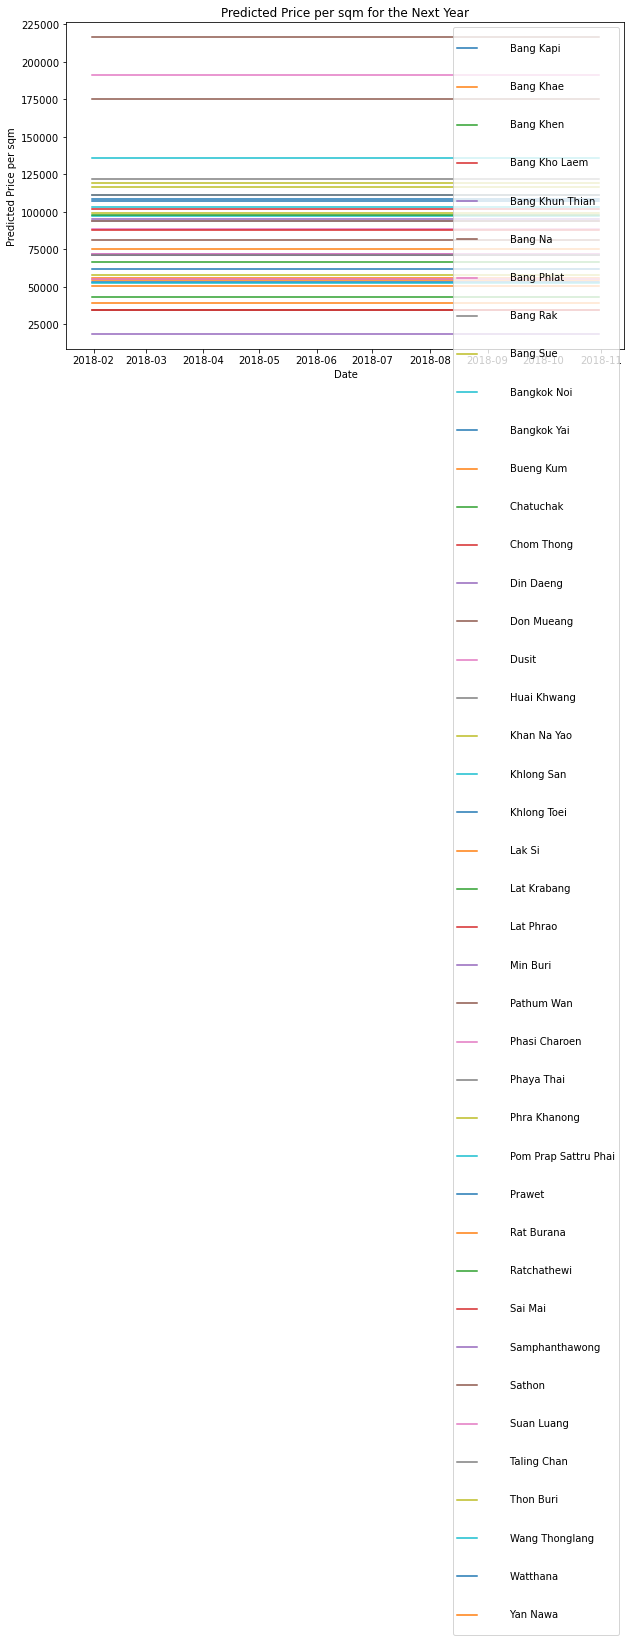

In [21]:
future_df['value'] = model.predict(future_df[features])
future_df = future_df[future_df['date'].dt.year >= 2018]


plt.figure(figsize=(10, 6))

for district in districts:
    data = future_df[future_df['district'] == district]
    plt.plot(data['date'], data['value'], label=district)

plt.xlabel('Date')
plt.ylabel('Predicted Price per sqm')
plt.title('Predicted Price per sqm for the Next Year')
plt.legend()
plt.show()


In [22]:
#based on each district 

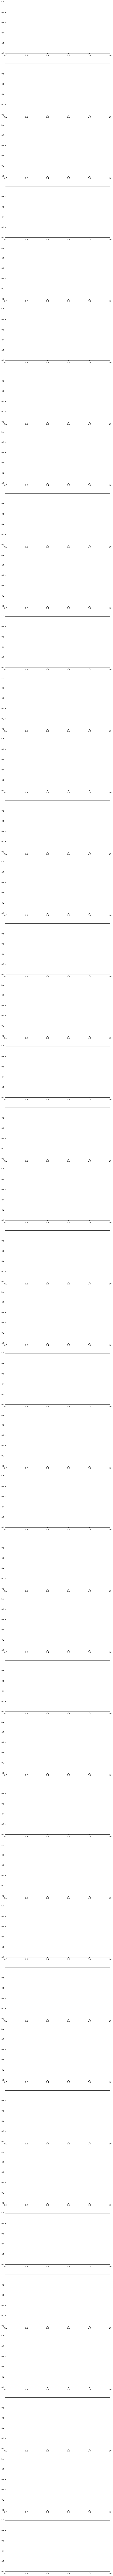

In [23]:
fig, axs = plt.subplots(len(districts), 1, figsize=(10, 6 * len(districts)))

In [27]:
for i, district in enumerate(districts):
    last_row = df[df['district'] == district].iloc[-1]
    
    #dates from 2010 to 2022
    future_dates = pd.date_range(start='2010-01-01', end='2022-12-31', freq='3M')
    future = pd.DataFrame(future_dates, columns=['date'])
    
    for feature in features:
        future[feature] = last_row[feature]
        
    future['district'] = district
    future_df = future_df.append(future, ignore_index=True)
    future_df['value'] = model.predict(future_df[features])

    future_district = future_df[future_df['district'] == district]
    future_district = future_district[future_district['date'].dt.year >= 2018]

    axs[i].plot(future_district['date'], future_district['value'], label='Predicted')
    
    actual_district = df[df['district'] == district]
    axs[i].plot(actual_district['date'], actual_district['value'], linestyle='dashed', alpha=0.5, label='Actual')

    z = np.polyfit(np.arange(len(future_district)), future_district['value'], 1)
    p = np.poly1d(z)
    axs[i].plot(future_district['date'], p(np.arange(len(future_district))), color='red', label='Trend Line')

    price_2018 = future_district[future_district['date'].dt.year == 2018]['value'].values[0]
    axs[i].annotate(f'2018 Price: {price_2018:.2f} at {district}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10)

    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price per sqm')
    axs[i].set_title(f'Predicted vs Actual Price per sqm - {district}')
    axs[i].legend()
    
plt.tight_layout()
plt.show()



/var/folders/3n/339_csz12x3grjvs27crr0c80000gn/T/ipykernel_88557/2403571597.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(future, ignore_index=True)
/var/folders/3n/339_csz12x3grjvs27crr0c80000gn/T/ipykernel_88557/2403571597.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(future, ignore_index=True)
/var/folders/3n/339_csz12x3grjvs27crr0c80000gn/T/ipykernel_88557/2403571597.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(future, ignore_index=True)
/var/folders/3n/339_csz12x3grjvs27crr0c80000gn/T/ipykernel_88557/2403571597.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

/var/folders/3n/339_csz12x3grjvs27crr0c80000gn/T/ipykernel_88557/2403571597.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(future, ignore_index=True)
/var/folders/3n/339_csz12x3grjvs27crr0c80000gn/T/ipykernel_88557/2403571597.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(future, ignore_index=True)
/var/folders/3n/339_csz12x3grjvs27crr0c80000gn/T/ipykernel_88557/2403571597.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(future, ignore_index=True)
/var/folders/3n/339_csz12x3grjvs27crr0c80000gn/T/ipykernel_88557/2403571597.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>